In [1]:
# installing necessary libraries
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install math
!pip install random

# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random



---
# Weibull Distribution

### Simulation
#### Overview
This code simulates the Weibull distribution using a dataset of time-to-failure (TTF) values. It estimates the shape factor ($k$) and scale parameter ($\lambda$) using a linear regression approach and plots both the Cumulative Distribution Function (CDF) and Probability Density Function (PDF).

#### Key Equations
1. Cumulative Distribution Function (CDF):
$$F(t) = 1 - e^{-\left( \frac{t}{\lambda} \right)^k}$$
2. Probability Density Function (PDF):
$$f(t) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-\left( \frac{t}{\lambda} \right)^k}$$
3. Estimating Shape Factor ($k$) and Scale Parameter ($\lambda$) using Regression:
  - The equation for $k$ (also known as beta) is determined by fitting a straight line to the transformed failure data.
  - The intercept of this line helps estimate $\lambda$ (also called eta).



In [2]:
dataset = [4, 2, 2, 5, 8, 12, 15, 20, 25, 30, 40, 50, 75] # dataset of "time to failure", in this case: days

beta (k) = 0.9363920836339962
eta (lambda) = 22.67899172022364


<ipython-input-3-d888e4804534>:29: RuntimeWarning: divide by zero encountered in scalar power
  return (k / lamb) * ((time / lamb) ** (k - 1)) * math.exp(-(time / lamb) ** k)


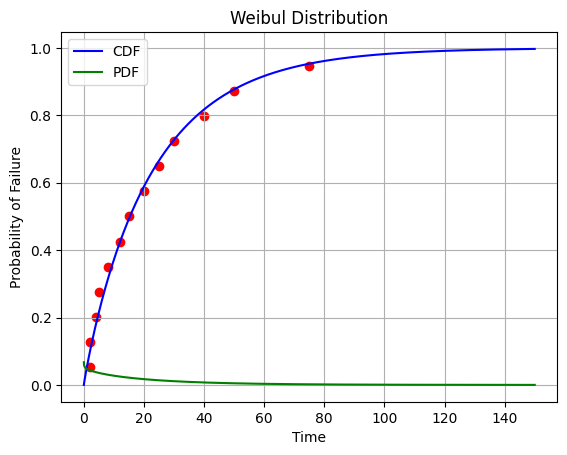

In [3]:
# FUNCTIONS
# function to calculate beta or k value and eta or lambda value
def calculate_beta_eta(dataset, median_rank):
  ln_ttf = [math.log(x) for x in dataset]
  linear_median_rank = [math.log(-math.log(1 - x)) for x in median_rank]

  x_mean = sum(ln_ttf) / len(ln_ttf)
  y_mean = sum(linear_median_rank) / len(linear_median_rank)

  sum1 = sum([(x - x_mean) * (y - y_mean) for (x, y) in zip(ln_ttf, linear_median_rank)])
  sum2 = sum([(x - x_mean) ** 2 for (x, y) in zip(ln_ttf, linear_median_rank)])

  beta = sum1 / sum2

  intercept = y_mean - beta * x_mean

  return beta, 1 / math.exp(intercept / beta)

def generate_median_rank(dataset):
  max_ind = len(dataset)
  return [(i + 1 - 0.3) / (max_ind + 0.4) for i in range(len(dataset))]

# Cumulative Distribution Function
def WdistCDF(time, lamb, k):
  return 1 - math.exp(-(time / lamb) ** k)

# probability density function
def WdistPDF(time, lamb, k):
  return (k / lamb) * ((time / lamb) ** (k - 1)) * math.exp(-(time / lamb) ** k)


# IMPLEMENTATION
# calculate values
dataset.sort()
N = len(dataset)

median_rank = generate_median_rank(dataset)
beta, eta = calculate_beta_eta(dataset, median_rank)
print(f"beta (k) = {beta}\neta (lambda) = {eta}")


# PLOTTING
# actual probability of dataset
x_actual = dataset
y_actual = median_rank
plt.scatter(x_actual, y_actual, color = "red")

# CDF
x_cdf = np.linspace(0, dataset[-1] * 2, dataset[-1] * 100 * 2 + 1)
y_cdf = [WdistCDF(x, eta, beta) for x in x_cdf]
plt.plot(x_cdf, y_cdf, color = "blue", label = "CDF")

# PDF
x_pdf = np.linspace(0, dataset[-1] * 2, dataset[-1] * 100 * 2 + 1)
y_pdf = [WdistPDF(x, eta, beta) for x in x_pdf]
plt.plot(x_pdf, y_pdf, color = "green", label = "PDF")

# plots
plt.xlabel("Time")
plt.ylabel("Probability of Failure")
plt.title("Weibul Distribution")
plt.legend()
plt.grid(True)

#### Key Components in the Code
1. Calculate Median Rank (Empirical Probability of Failure)
  - The median rank formula approximates the probability of failure for each observed failure time:
  $$R(i) = \frac{i - 0.3}{N + 0.4}
$$
  - This is implemented in `generate_median_rank(dataset)`.

2. Estimate Weibull Parameters ($k$, $λ$)
  - Convert failure times into their natural logarithm.
  - Convert median rank into double-log transformation.
  - Use linear regression to estimate $k$ and $\lambda$.
  - This is handled by `calculate_beta_eta(dataset, median_rank)`.

3. Compute Weibull CDF & PDF
  - `WdistCDF(time, lamb, k)` calculates the probability that failure has occurred by time $t$.
  - `WdistPDF(time, lamb, k)` calculates the probability density at time $t$.

4. Plot Weibull Distribution
  - Scatter plot of the actual dataset (red dots).
  - Theoretical CDF (blue curve).
  - Theoretical PDF (green curve).

#### Expected Output
- The red scatter points represent actual failure probabilities from the dataset.
- The blue line represents the estimated Weibull CDF (cumulative failure probability).
- The green line represents the Weibull PDF (failure rate at each time step).

#### Key Notes
- If $k=1$, the PDF Weibull distribution reduces to the Exponential Distribution.
- If $k=2$, the PDF Weibull distribution takes the form of the Rayleigh Distribution.
- The algorithm used to calculate $k$ (beta) is known as Bernard’s Approximation, which is why we generate median ranks before performing linear regression.
